In [1]:
#TFIDF for a corpus of PubMed Abstracts, subgroup separated by NMF
#2441 abstracts converted into a .csv corpus

In [2]:
import functions

In [3]:
functions.outputs.make_csv("/Users/manojarachige/Documents/Coding/BMedScDOC1/Assets/TM_abstracts", "txt")

In [4]:
#csv called corpus.csv saved to current working directory

In [5]:
import pandas as pd
import csv

df=pd.read_csv('corpus.csv', encoding = 'unicode_escape', encoding_errors = 'ignore', engine ='c')
df.head()

,name,text
0,10029032.txt,\n1. J Trauma. 1999 Feb;46(2):268-70.\n\nThe u...
1,10081599.txt,\n1. Brain Inj. 1999 Mar;13(3):173-89.\n\nEpid...
2,1015233.txt,\n1. Acta Anaesthesiol Belg. 1976;27 suppl:305...
3,1016848.txt,\n1. Brain Behav Evol. 1976;13(5):376-95.\n\nB...
4,10192982.txt,\n1. Acta Med Port. 1998 Dec;11(12):1085-90.\n...


In [6]:
df['processed_text'] = df['text'].apply(functions.processing.preprocess)
df.head()

,name,text,processed_text
0,10029032.txt,\n1. J Trauma. 1999 Feb;46(2):268-70.\n\nThe u...,"[trauma, febthe, utility, head, compute, tomog..."
1,10081599.txt,\n1. Brain Inj. 1999 Mar;13(3):173-89.\n\nEpid...,"[brain, inj, marepidemiology, predictor, postc..."
2,1015233.txt,\n1. Acta Anaesthesiol Belg. 1976;27 suppl:305...,"[acta, anaesthesiol, belg, supplthe, preventio..."
3,1016848.txt,\n1. Brain Behav Evol. 1976;13(5):376-95.\n\nB...,"[brain, behav, evol, brain, circuit, conscious..."
4,10192982.txt,\n1. Acta Med Port. 1998 Dec;11(12):1085-90.\n...,"[acta, med, port, decthe, initial, loss, consc..."


In [7]:
df["word_count"] = df["processed_text"].apply(lambda x: len(x))
#add in a line to remove 0 wc texts
df = df[~(df.word_count == 0)]


df.head()

,name,text,processed_text,word_count
0,10029032.txt,\n1. J Trauma. 1999 Feb;46(2):268-70.\n\nThe u...,"[trauma, febthe, utility, head, compute, tomog...",144
1,10081599.txt,\n1. Brain Inj. 1999 Mar;13(3):173-89.\n\nEpid...,"[brain, inj, marepidemiology, predictor, postc...",136
2,1015233.txt,\n1. Acta Anaesthesiol Belg. 1976;27 suppl:305...,"[acta, anaesthesiol, belg, supplthe, preventio...",95
3,1016848.txt,\n1. Brain Behav Evol. 1976;13(5):376-95.\n\nB...,"[brain, behav, evol, brain, circuit, conscious...",53
4,10192982.txt,\n1. Acta Med Port. 1998 Dec;11(12):1085-90.\n...,"[acta, med, port, decthe, initial, loss, consc...",151


In [8]:
# Descriptive statistics for word count
df['word_count'].describe()
#95%CI Calculated: 

count    2436.000000
mean      156.522989
std        72.971497
min         8.000000
25%       114.000000
50%       153.000000
75%       196.000000
max       682.000000
Name: word_count, dtype: float64

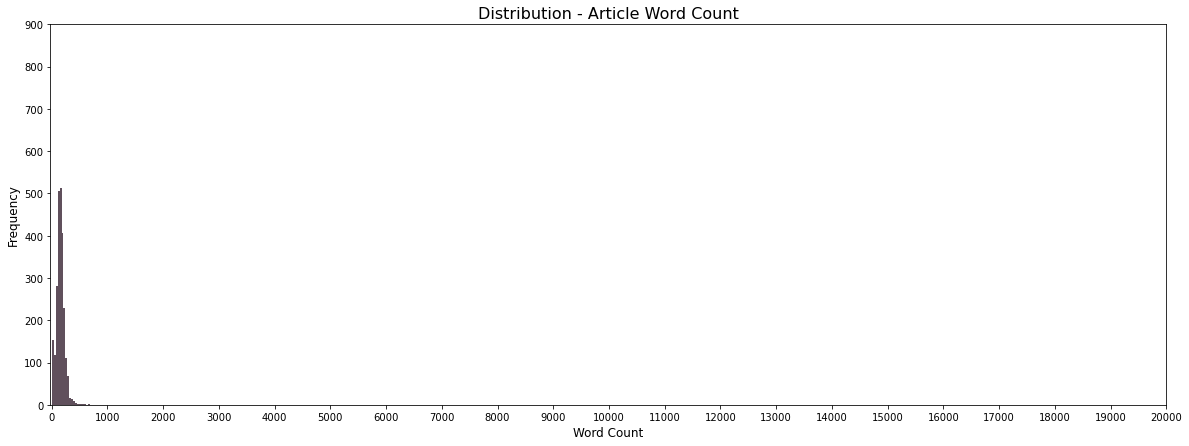

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Plot a hist of the word counts
fig = plt.figure(figsize=(20,7))

plt.hist(
    df['word_count'],
    bins=20,
    color='#60505C'
)

plt.title('Distribution - Article Word Count', fontsize=16)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Word Count', fontsize=12)
plt.yticks(np.arange(0, 1000, 100))
plt.xticks(np.arange(0, 21000, 1000))

file_name = 'hist'

plt.show()

In [10]:
from collections import Counter

# Get the top 20 most common words among all the articles
p_text = df['processed_text']

# Flaten the list of lists
p_text = [item for sublist in p_text for item in sublist]

# Top 20
top_20 = pd.DataFrame(
    Counter(p_text).most_common(20),
    columns=['word', 'frequency']
)

top_20

,word,frequency
0,patient,5769
1,brain,4507
2,consciousness,3367
3,university,3216
4,injury,2710
5,information,2524
6,disorder,2253
7,index,2244
8,study,2220
9,medline,2066


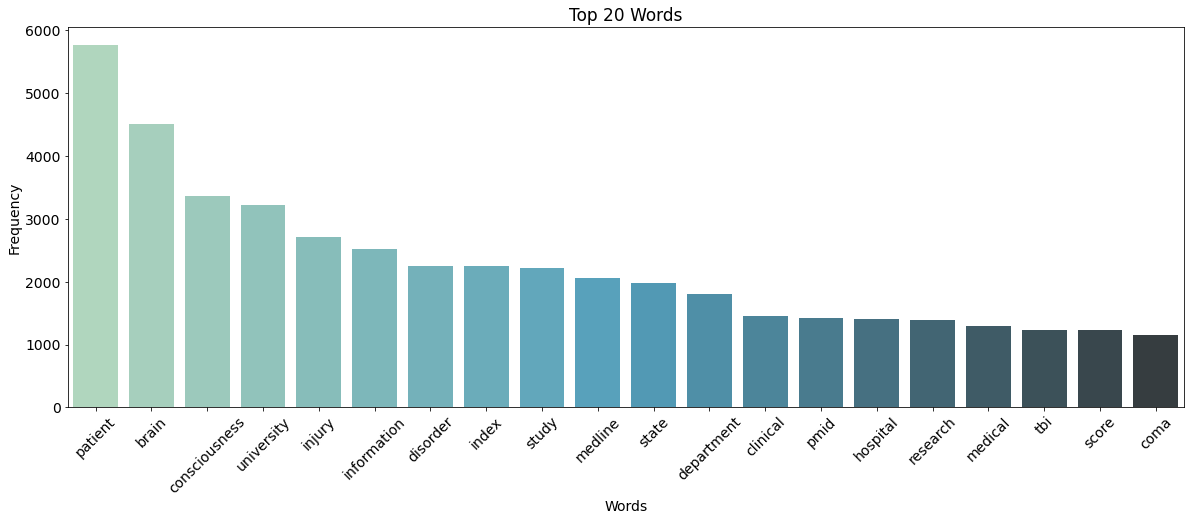

In [11]:
import seaborn as sns

# Plot a bar chart for the top 20 most frequently occuring words
fig = plt.figure(figsize=(20,7))

g = sns.barplot(
    x='word',
    y='frequency',
    data=top_20,
    palette='GnBu_d'
)

g.set_xticklabels(
    g.get_xticklabels(),
    rotation=45,
    fontsize=14
)

plt.yticks(fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 20 Words', fontsize=17)

plt.show()

In [12]:
# Get the number of unique words after processing
num_unique_words = len(set(p_text))
num_unique_words

61752

In [13]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from collections import Counter
from operator import itemgetter

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# create a dataframe with the text data
df['string_text'] = df["processed_text"].apply(lambda x: ' '.join(x))


df.head()

# create the TfidfVectorizer object
vectorizer = TfidfVectorizer()

# fit the vectorizer to the data and transform the data
tfidf_scores = vectorizer.fit_transform(df['string_text'])

# get the feature names
feature_names = vectorizer.get_feature_names()

# create a dataframe with the tf-idf scores
tfidf_df = pd.DataFrame(tfidf_scores.toarray(), columns=feature_names)

In [15]:
# calculate the mean tf-idf value for each word across the corpus
mean_tfidf = tfidf_df.mean()

# sort the mean tf-idf values in descending order
mean_tfidf = mean_tfidf.sort_values(ascending=False)

# view the top 10 most important words
print(mean_tfidf.head(10))

patient          0.041245
brain            0.032304
injury           0.026055
consciousness    0.023717
university       0.022930
state            0.020390
disorder         0.019938
study            0.017564
tbi              0.017144
head             0.016388
dtype: float64


In [16]:
dict_path = "/Users/manojarachige/Documents/Coding/BMedScDOC1/Assets/Inputs/CombinedDict.txt"
dictionary = []
dictionary = functions.os_level.makedict(dict_path)
dictionary

['precentral_gyrus',
 'superior_frontal_gyrus',
 'middle_frontal_gyrus',
 'ifg_opercular_part',
 'ifg_triangular_part',
 'ifg_pars_orbitalis',
 'rolandic_operculum',
 'olfactory_cortex',
 'sfg_medial',
 'sfg_medial_orbital',
 'gyrus_rectus',
 'medial_orbital_gyrus',
 'anterior_orbital_gyrus',
 'posterior_orbital_gyrus',
 'lateral_orbital_gyrus',
 'insular_cortex',
 'paracingulate',
 'cingulate_cortex',
 'middle_cingulate_gyrus',
 'posterior_cingulate_gyrus',
 'hippocampus',
 'parahippocampus',
 'amygdala',
 'calcarine_fissure',
 'cuneus',
 'lingual_gyrus',
 'superior_occipital_gyrus',
 'middle_occipital_gyrus',
 'inferior_occipital_gyrus',
 'postcentral_gyrus',
 'inferior_parietal_gyrus',
 'precuneus',
 'paracentral_lobule',
 'caudate_nucleus',
 'lenticular_nucleus',
 'lenticular_nucleus_putamen',
 'lenticular_nucleus_pallidum',
 'thalamus',
 'heschls_gyrus',
 'cerebellar_crus',
 'cerebellum',
 'vermis',
 'thalamus_anteroventral_nucleus',
 'lateral_posterior_thalamus',
 'ventral_anteri

In [19]:
# create a list
my_list = dictionary

# create a set of items to remove from the list
remove_set = set(['sfg_medial', 'temporopolar_area', 'parasubicular_area', 'medial_geniculate_thalamus', 'ventral_posterior_cingulate_cortex', 'ectosplenial', 'substantia_nigra_pars_compacta', 'nucleus_accumbens', 'anterior_orbital_gyrus', 'perirhinal_cortex', 'anterior_cingulate_cortex_supracallosal', 'lenticular_nucleus_putamen', 'thalamus_anteroventral_nucleus', 'ifg_triangular_part', 'mediodorsal_medial_magnocellular_thalamus', 'reuniens_thalamus', 'agranular_retrolimbic_area', 'ifg_pars_orbitalis', 'presubiculum', 'posterior_cingulate_gyrus', 'ventral_tegmental_area', 'rhinal_sulcus', 'dorsal_entorhinal_cortex', 'dorsal_anterior_cingulate_cortex', 'lenticular_nucleus', 'inferior_occipital_gyrus', 'pulvinar_anterior_thalamus', 'pulvinar_lateral_thalamus', 'ventral_lateral_thalamus', 'pulvinar_medial_thalamus', 'anterior_cingulate_cortex', 'sfg_medial_orbital', 'medial_orbital_gyrus', 'parainsular_area', 'ifg_opercular_part', 'middle_cingulate_gyrus', 'lateral_posterior_thalamus', 'substantia_nigra_pars_reticulata', 'paracingulate', 'frontal_eye_fields', 'ventral_posterolateral_thalamus', 'lateral_geniculate_thalamus', 'heschls_gyrus', 'superior_occipital_gyrus', 'lateral_orbital_gyrus', 'parahippocampus', 'mediodorsal_lateral_parvocellular_thalamus', 'dorsal_posterior_cingulate_cortex', 'retrosubicular_area', 'ventral_anterior_cingulate_cortex', 'brocas_area', 'ventral_anterior_thalamus', 'gyrus_rectus', 'visuomotor_coordination', 'anterior_prefrontal_cortex', 'pulvinar_inferior_thalamus'])

# convert the list to a set and use the difference() method to remove the items
my_list = list(set(my_list).difference(remove_set))

# view the resulting list
print(my_list)

['calcarine_fissure', 'superior_frontal_gyrus', 'paracentral_lobule', 'primary_somatosensory_cortex', 'rolandic_operculum', 'hippocampus', 'middle_temporal_gyrus', 'anterior_cingulate_cortex_subgenual', 'orbital_inferior_frontal_gyrus', 'auditory_cortex', 'middle_occipital_gyrus', 'lenticular_nucleus_pallidum', 'cerebellar_crus', 'anterior_cingulate_cortex_pregenual', 'amygdala', 'substantia_nigra', 'postcentral_gyrus', 'retrosplenial_cortex', 'primary_gustatory_cortex', 'supramarginal_gyrus', 'dorsolateral_prefrontal_cortex', 'locus_coeruleus', 'cerebellum', 'intralaminar_thalamus', 'red_nucleus', 'raphe_nucleus', 'cingulate_cortex', 'precentral_gyrus', 'ventral_entorhinal_cortex', 'precuneus', 'fusiform_gyrus', 'supplementary_motor_cortex', 'anterior_temporal_lobe', 'vermis', 'insular_cortex', 'posterior_orbital_gyrus', 'superior_parietal_lobule', 'premotor_cortex', 'superior_temporal_gyrus', 'thalamus', 'secondary_visual_cortex', 'lingual_gyrus', 'inferior_temporal_gyrus', 'associat

In [20]:
# create a list of the words to find the mean tf-idf values for
words = my_list

# calculate the mean tf-idf value for each word in the list
mean2_tfidf = tfidf_df[words].mean()

# sort the mean tf-idf values in descending order
mean2_tfidf = mean2_tfidf.sort_values(ascending=False)

# view the top 10 most important words
print(mean2_tfidf.head(10))

thalamus                          0.003154
precuneus                         0.001123
amygdala                          0.001053
hippocampus                       0.000962
cerebellum                        0.000828
dorsolateral_prefrontal_cortex    0.000685
cingulate_cortex                  0.000504
primary_motor_cortex              0.000454
orbitofrontal_area                0.000420
orbital_inferior_frontal_gyrus    0.000376
dtype: float64
